In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
# print(plt.style.available)
# plt.style.use('_classic_test_patch')
# matplotlib.rcParams.update(mpl.rcParamsDefault) # to reset style to default

In [2]:
log_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Log/'
out_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Plots/'
models = os.listdir(log_dir)
print(models)

['all_subjects_baseline', 'subject_5_baseline2', 'multi_subject_torch', 'subject_1_baseline', 'subject_1_layer_norm', 'subject_7_baseline2', 'subject_1_baseline2', 'subject_2_dot_product', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_2_lc_baseline', 'subject_1_and_2', 'all_subjects_3', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2', 'all_subjects_naive', 'all_subjects_dot_product']


In [3]:
data = {}
for m in models:
    try:
        data[m] = pd.read_csv(f'{log_dir}/{m}/loss_history.csv')
    except FileNotFoundError:
        print(f"model: {m} - has no loss data")
print(data.keys())

model: test_ms3 - has no loss data
dict_keys(['subject_1_baseline', 'subject_1_layer_norm', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'all_subjects_3', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2', 'all_subjects_naive', 'subject_2_noise'])


In [4]:
def get_loss(df, key='val_loss') -> list:
    loss = df.dropna(subset=[key]).groupby('epoch')[key].apply(list)
    return [loss[i][-1] for i in range(len(loss))]

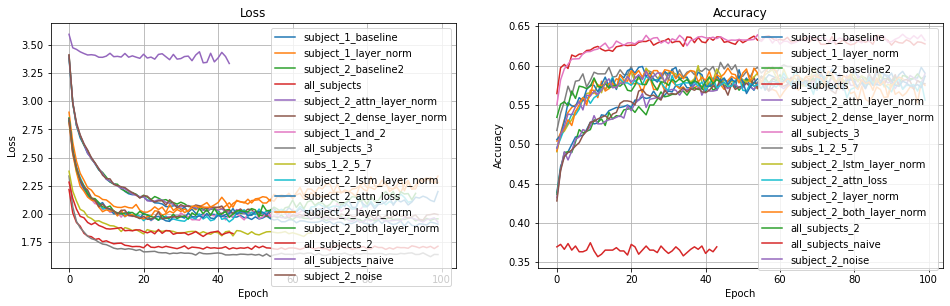

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16,4.5))

for i, (k, v) in enumerate(data.items()):
    ax[0].plot( get_loss(v, 'val_loss'), label=k )
    ax[0].grid('on')

ax[0].legend()
ax[0].set_title("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

for i, (k, v) in enumerate(data.items()):
    try:
        ax[1].plot( get_loss(v, 'val_accuracy'), label=k)
        ax[1].grid('on')
    except KeyError:
        pass

ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
    
# plt.suptitle("Cross-entropy loss & accuracy")
plt.xlim(xmin = -(.05 * plt.gca().get_xlim()[1]))
# plt.legend()
# plt.grid()
plt.savefig(f"{out_dir}/loss_plot.png")
plt.show()

dict_keys(['subject_1_baseline', 'subject_1_layer_norm', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'all_subjects_3', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2', 'all_subjects_naive', 'subject_2_noise'])


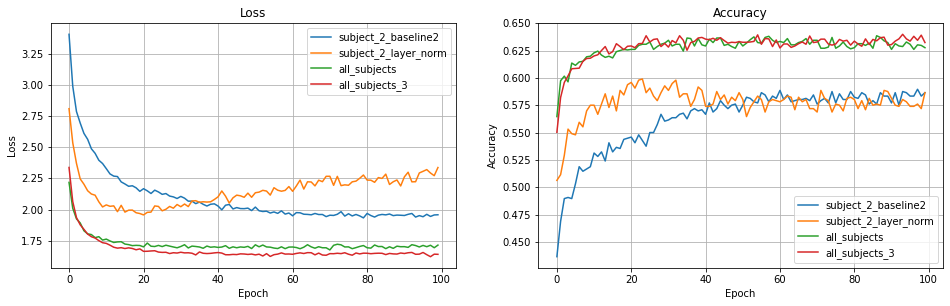

In [10]:
def loss_plot(models_, title_str: str):
    fig, ax = plt.subplots(1, 2, figsize=(16,4.5))

    for k in models_:
        v = data[k]
        ax[0].plot( get_loss(v, 'val_loss'), label=k )
        ax[0].grid('on')
    

    ax[0].legend()
    ax[0].set_title("Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    for k in models_:
        v = data[k]
        try:
            ax[1].plot( get_loss(v, 'val_accuracy'), label=k)
            ax[1].grid('on')
        except KeyError:
            pass

    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()

    # plt.suptitle("Cross-entropy loss & accuracy")
    plt.xlim(xmin = -(.05 * plt.gca().get_xlim()[1]))
    # plt.legend()
    # plt.grid()
#     plt.savefig(f"{out_dir}/{title_str}.png")

print(data.keys())

loss_plot(
    ['subject_2_baseline2', 'subject_2_layer_norm', 'all_subjects', 'all_subjects_3'], 
#     ['subject_2_layer_norm', 'all_subjects'],
    title_str='sub2_v_all_subs')

plt.show()

10

In [102]:
df = pd.read_csv(f"/home/hpcgies1/Masters-Thesis/AttemptFour/TrainData/subj08_conditions2.csv")
df.head(2)

,nsd_key,is_shared,is_test
0,22,0,0
1,27,0,0


In [104]:
print(df['nsd_key'].loc[df['is_shared']==1])

224      3050
227      3078
232      3158
233      3165
234      3172
        ...  
5389    72210
5394    72313
5407    72606
5418    72720
5439    72949
Name: nsd_key, Length: 515, dtype: int64


# Torch Multi-subject

In [37]:
log_dir2 = '/home/hpcgies1/rds/hpc-work/NIC/Log/'

In [38]:
loss = glob.glob(f'{log_dir2}/multi_subject_torch2/*.csv')[0]
loss = pd.read_csv(loss, index_col=0)
print(loss.columns)

Index(['epoch', 'sub', 'batch', 'loss', 'accuracy', 'val_loss',
       'val_accuracy'],
      dtype='object')


In [40]:
l = loss.groupby('epoch').mean()
l.head(25)

,sub,batch,loss,accuracy,val_loss,val_accuracy
epoch,,,,,,
1,4.290053,146.426937,2.862962,0.509920,2.606050,0.530526
2,4.290053,146.426937,2.339278,0.551479,2.502444,0.542148
3,4.290053,146.426937,2.208979,0.564869,2.481161,0.544980
4,4.290053,146.426937,2.143363,0.572043,2.435075,0.550092
5,4.290053,146.426937,2.103523,0.576481,2.441459,0.550368
6,4.290053,146.426937,2.077993,0.579060,2.444315,0.551288
7,4.290053,146.426937,2.059462,0.581187,2.491109,0.551218
8,4.290053,146.426937,2.072028,0.579936,2.376420,0.557926
9,4.290053,146.426937,2.081601,0.579243,2.262621,0.564361


In [29]:
loss.head(20)

,epoch,sub,batch,loss,accuracy,val_loss,val_accuracy
0,1,1,0,8.536612,0.000000,NaN,NaN
1,1,1,1,8.367942,0.002083,NaN,NaN
2,1,1,2,8.223238,0.117188,NaN,NaN
3,1,1,3,8.118207,0.202083,NaN,NaN
4,1,1,4,7.995764,0.235938,NaN,NaN
5,1,1,5,7.848537,0.285938,NaN,NaN
6,1,1,6,7.698761,0.315625,NaN,NaN
7,1,1,7,7.610177,0.322396,NaN,NaN
8,1,1,8,7.488472,0.327604,NaN,NaN
9,1,1,9,7.397500,0.322396,NaN,NaN


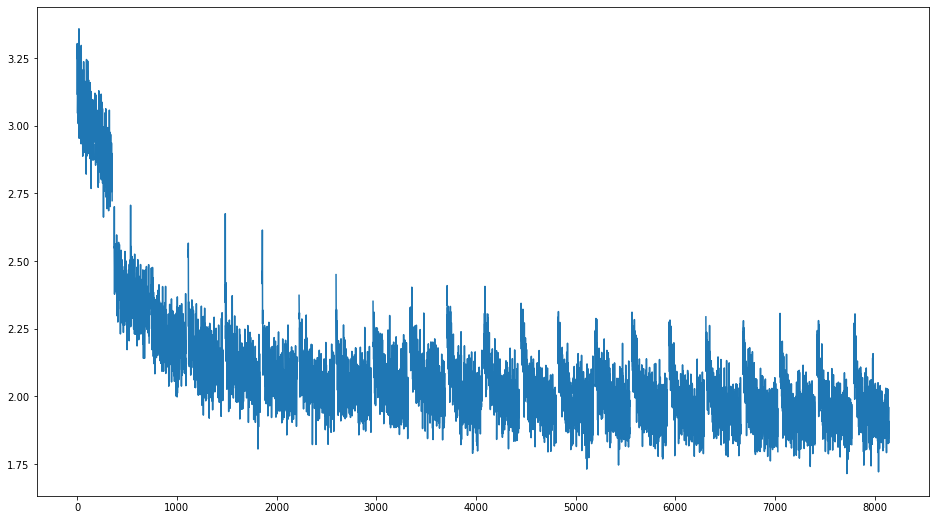

In [36]:
temp = loss['loss'].loc[loss['sub']==2]
temp = [i for i in temp]
plt.figure(figsize=(16,9))
plt.plot(temp)
plt.show()